## Data Science ( Employee Attrition )

In [1]:
import warnings
import pandas as pd

warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None  


In [2]:
import pandas as pd

In [3]:
data = pd.read_excel("pattern_data.xlsx")

### Data Exploration

In [4]:
data.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years,dept,salary,left
0,6.797957,3.066260,7,244,4.206831,0,0,technical,low,0
1,9.630808,9.304405,9,235,6.055493,0,0,marketing,low,1
2,5.125169,9.705333,4,237,4.959339,0,0,marketing,low,1
3,2.655206,1.682652,8,234,4.123693,1,0,marketing,low,0
4,4.021859,9.174195,8,192,5.234121,0,0,marketing,medium,0


In [5]:
data.shape

(30000, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      30000 non-null  float64
 1   lastEvaluation         30000 non-null  float64
 2   numberOfProjects       30000 non-null  int64  
 3   avgMonthlyHours        30000 non-null  int64  
 4   timeSpent.company      30000 non-null  float64
 5   workAccident           30000 non-null  int64  
 6   promotionInLast5years  30000 non-null  int64  
 7   dept                   30000 non-null  object 
 8   salary                 30000 non-null  object 
 9   left                   30000 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 2.3+ MB


In [7]:
data.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
promotionInLast5years    0
dept                     0
salary                   0
left                     0
dtype: int64

In [8]:
data[data.duplicated()]

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years,dept,salary,left


In [9]:
columns_of_interest = ['satisfactoryLevel', 'lastEvaluation', 'avgMonthlyHours', 'numberOfProjects', 'timeSpent.company', 'workAccident',	'left',	'promotionInLast5years']

### Correlations between features

In [10]:
data[columns_of_interest].corr()

,satisfactoryLevel,lastEvaluation,avgMonthlyHours,numberOfProjects,timeSpent.company,workAccident,left,promotionInLast5years
satisfactoryLevel,1.000000,0.003029,-0.006584,0.006618,-0.005358,-0.001103,0.452365,-0.001520
lastEvaluation,0.003029,1.000000,0.005445,-0.006354,0.001434,0.002574,0.453232,-0.005432
avgMonthlyHours,-0.006584,0.005445,1.000000,0.004423,0.000715,0.002713,0.002836,0.006468
numberOfProjects,0.006618,-0.006354,0.004423,1.000000,0.003427,0.001922,-0.005613,0.003522
timeSpent.company,-0.005358,0.001434,0.000715,0.003427,1.000000,-0.004873,0.071882,-0.000276
workAccident,-0.001103,0.002574,0.002713,0.001922,-0.004873,1.000000,0.005367,0.002532
left,0.452365,0.453232,0.002836,-0.005613,0.071882,0.005367,1.000000,-0.249010
promotionInLast5years,-0.001520,-0.005432,0.006468,0.003522,-0.000276,0.002532,-0.249010,1.000000


In [11]:

ftr=['numberOfProjects','timeSpent.company','workAccident','promotionInLast5years']

In [12]:
data['dept'] = data['dept'].astype('category')
data['salary'] = data['salary'].astype('category')

In [18]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------- ----------------------- 122.9/294.9 kB 3.5 MB/s eta 0:00:01
   ---------------------------------- ----- 256.0/294.9 kB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### Data Analysis through visualization

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

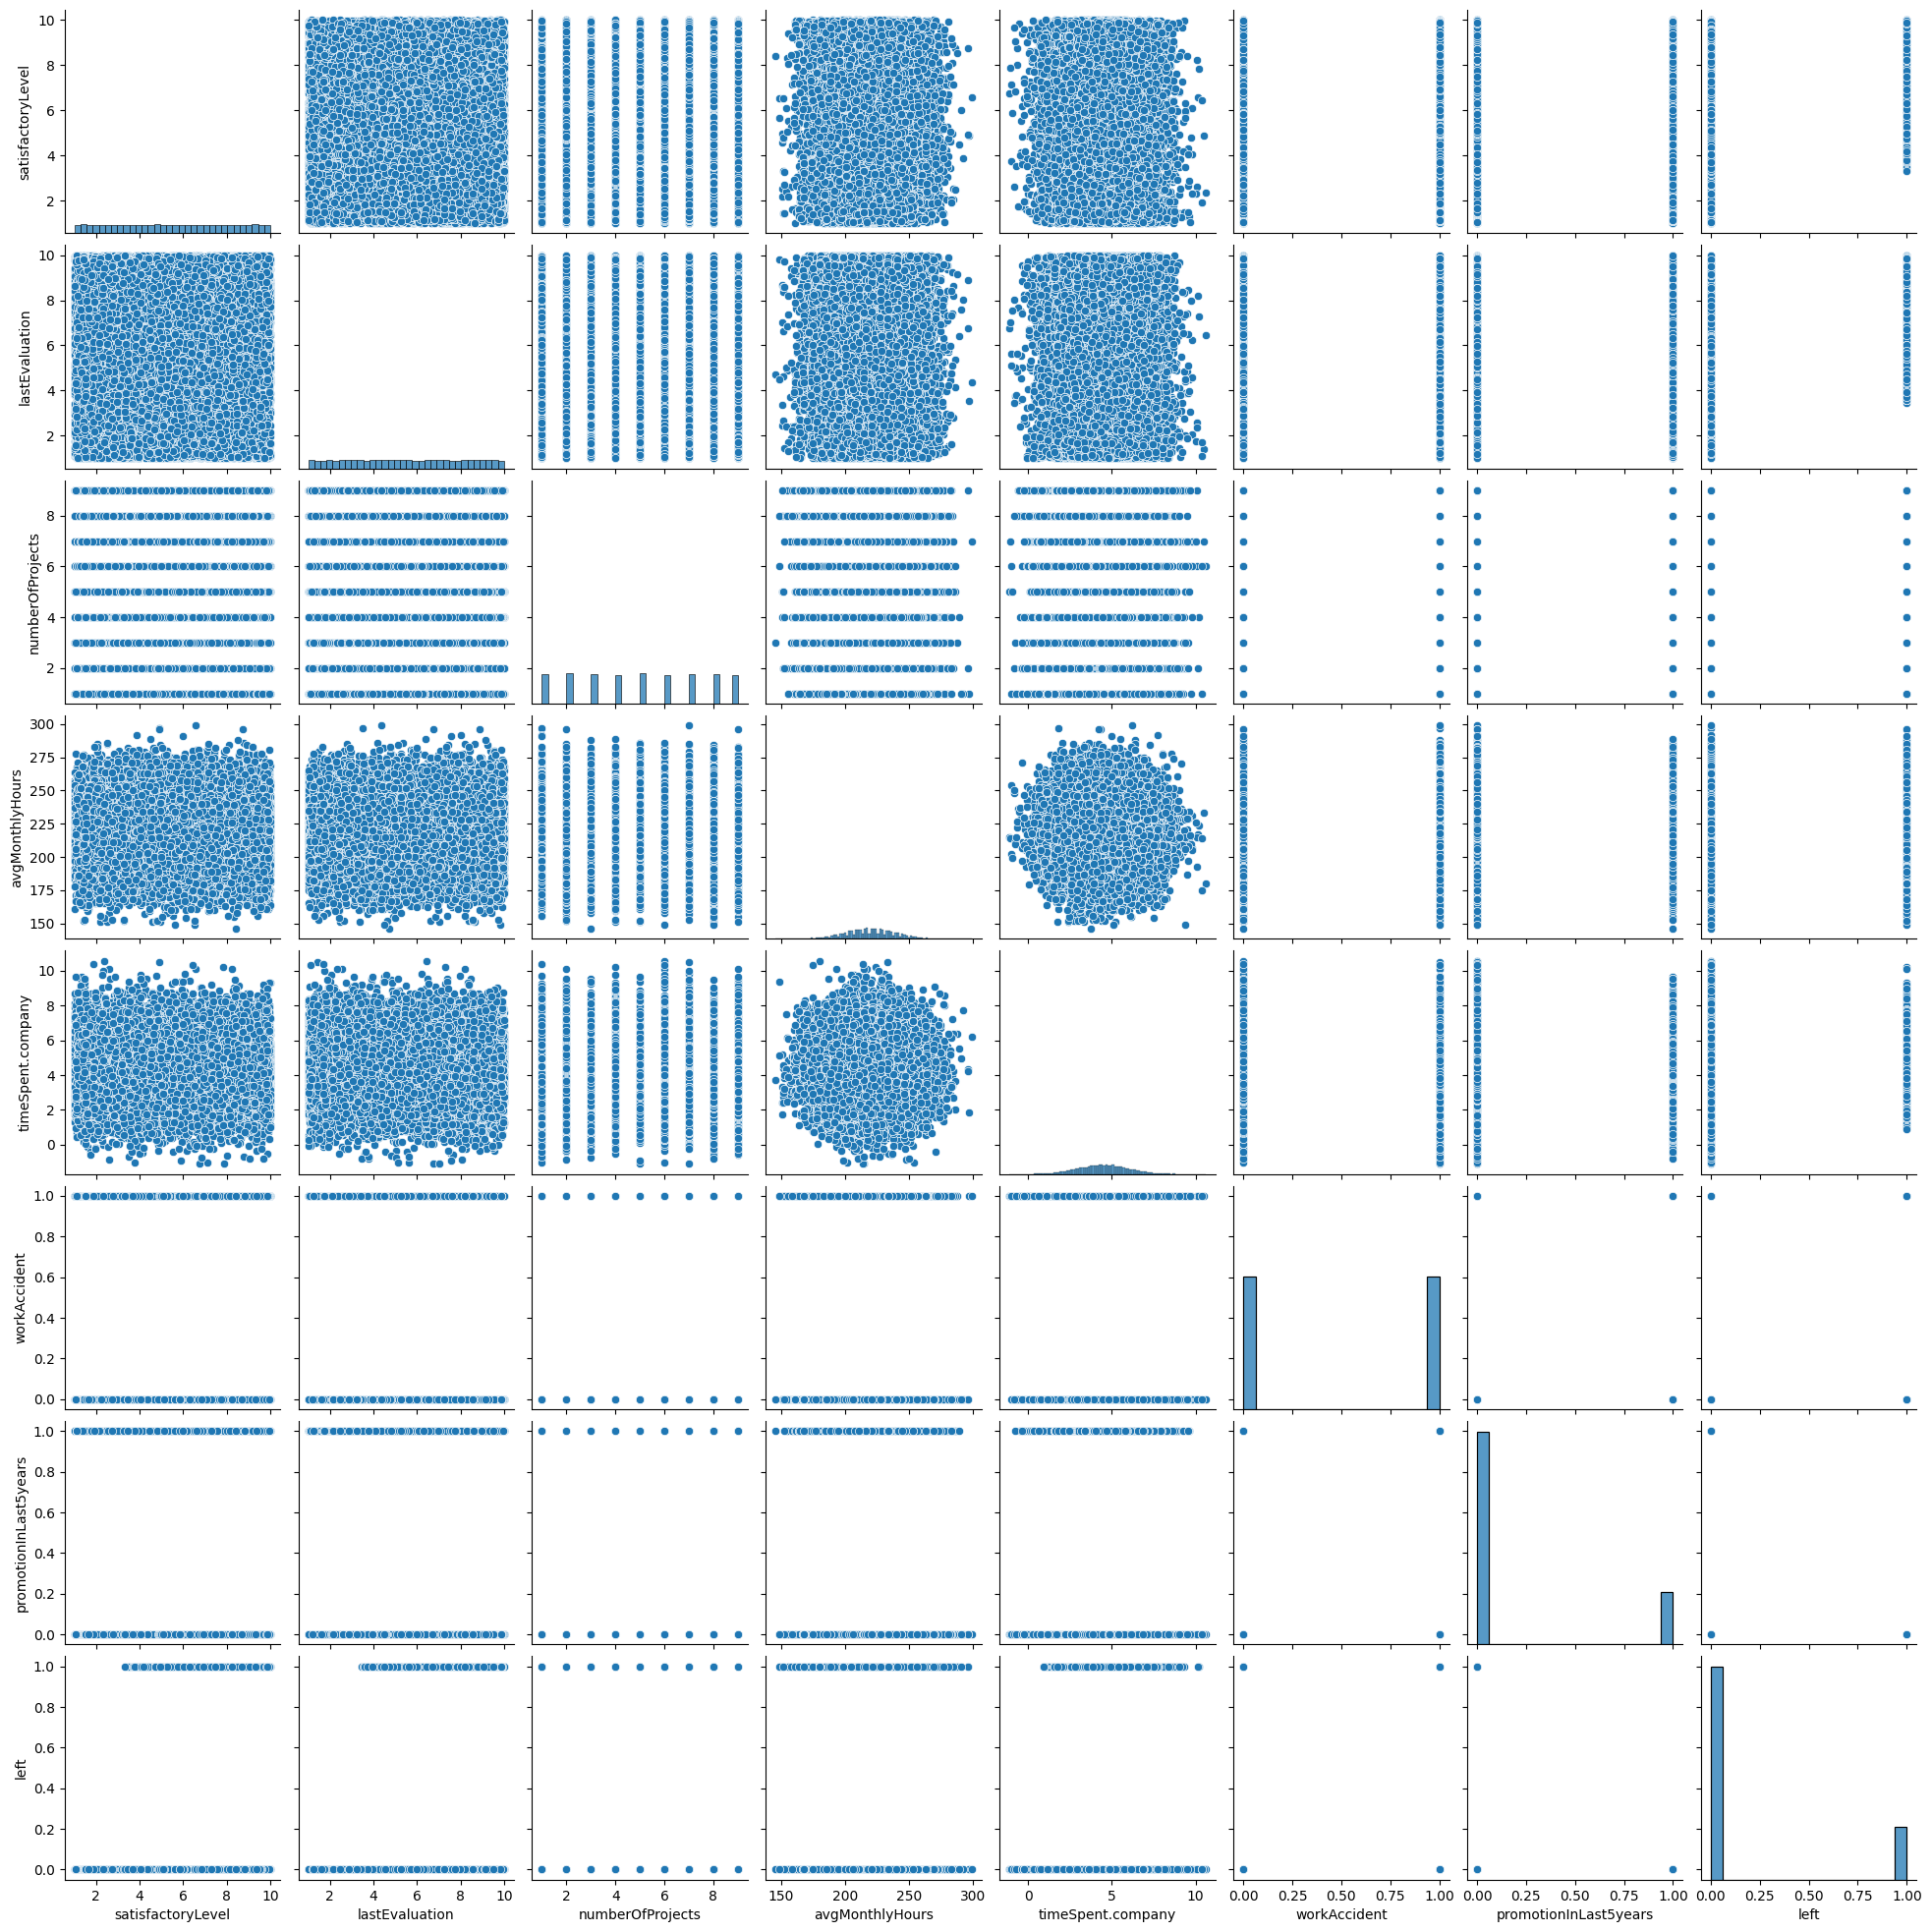

In [20]:
sns.pairplot(data)

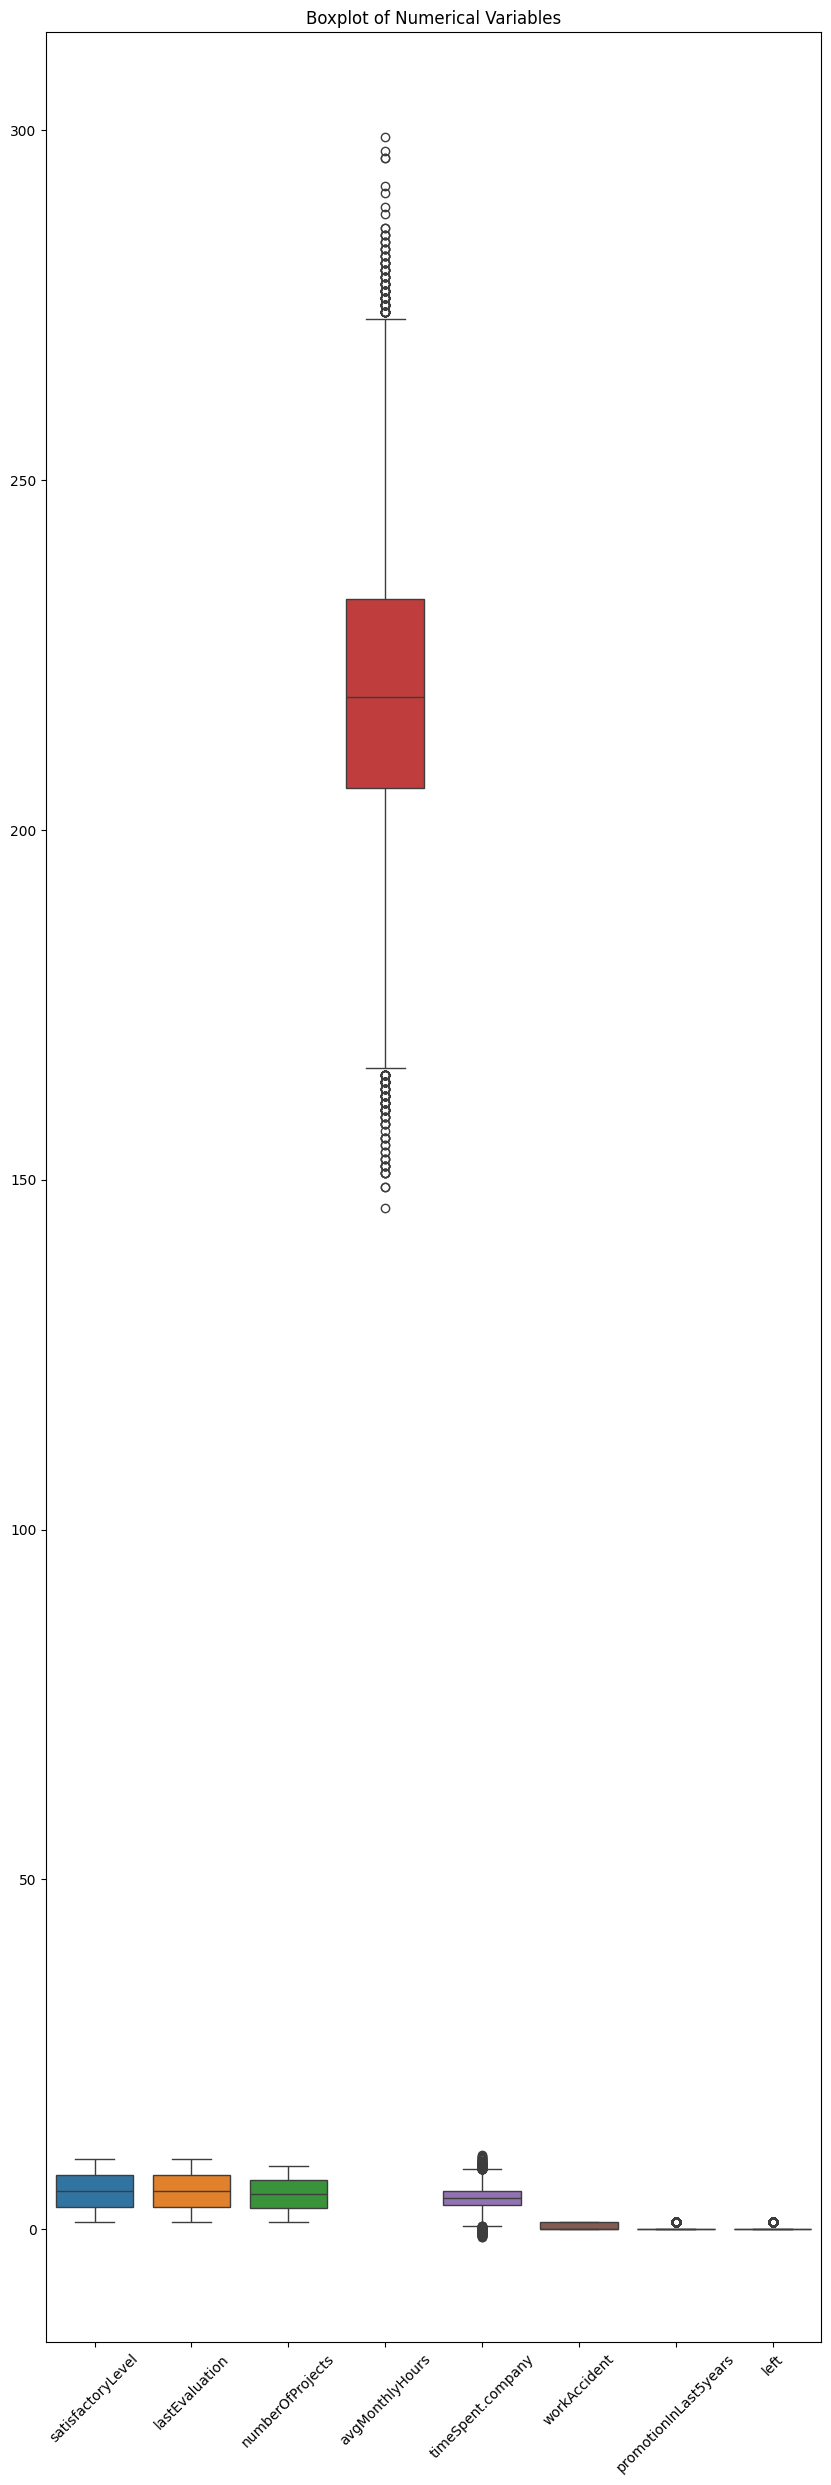

In [21]:
import numpy as np
numerical_vars = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(10, 30))
sns.boxplot(data=data[numerical_vars]) 
plt.title("Boxplot of Numerical Variables")
plt.xticks(rotation=45)
plt.show()

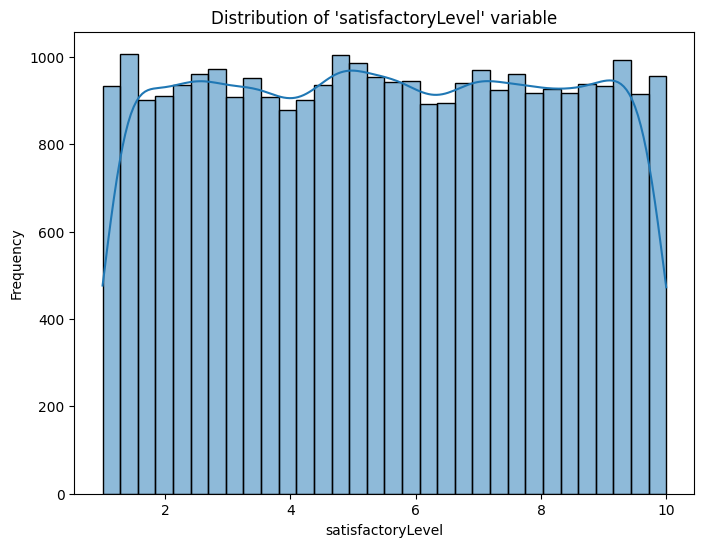

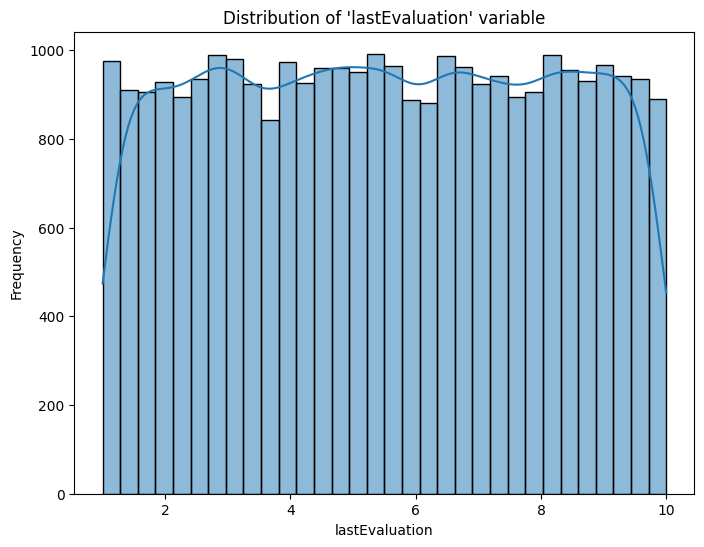

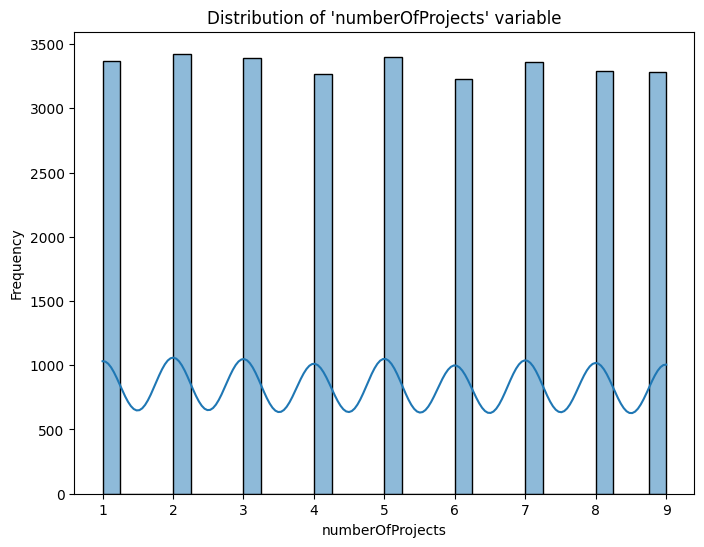

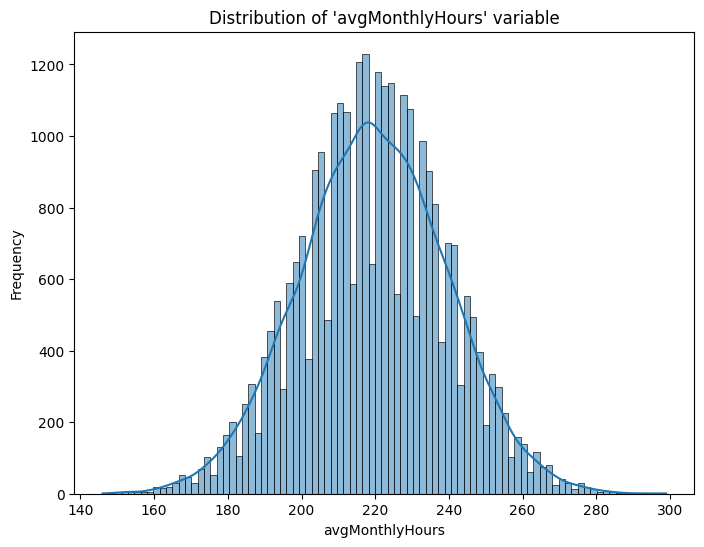

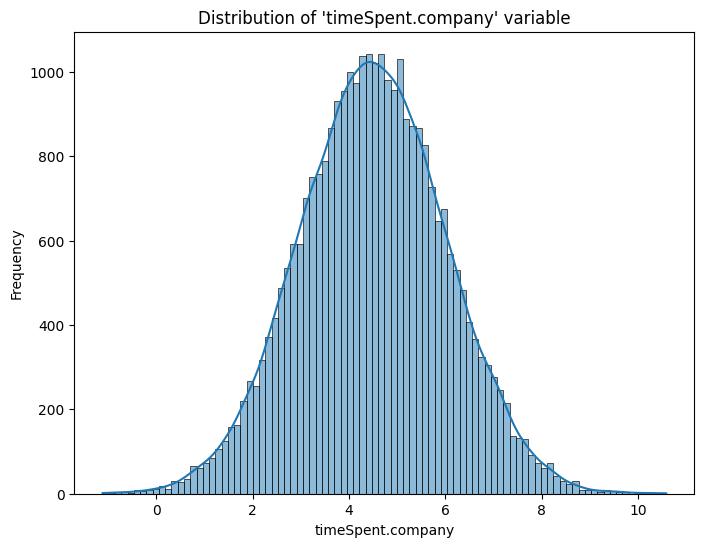

In [22]:
numerical_vars = ['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects', 'avgMonthlyHours', 'timeSpent.company']
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[var], kde=True)
    plt.title(f"Distribution of '{var}' variable")
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

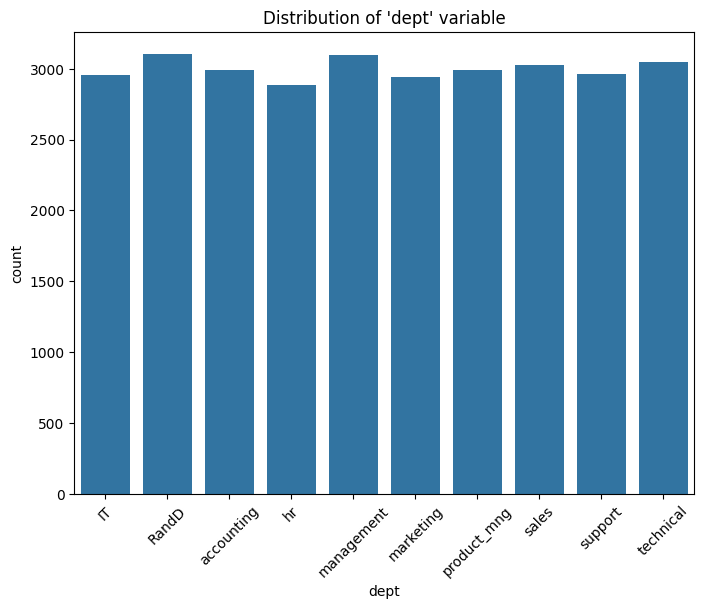

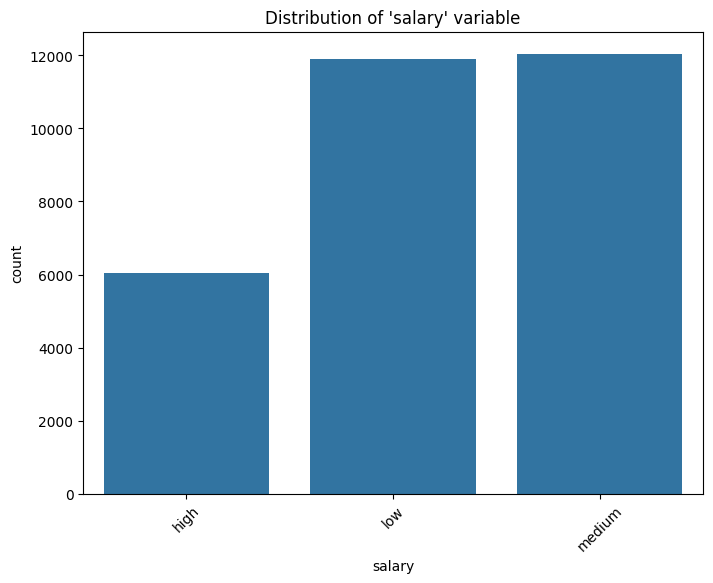

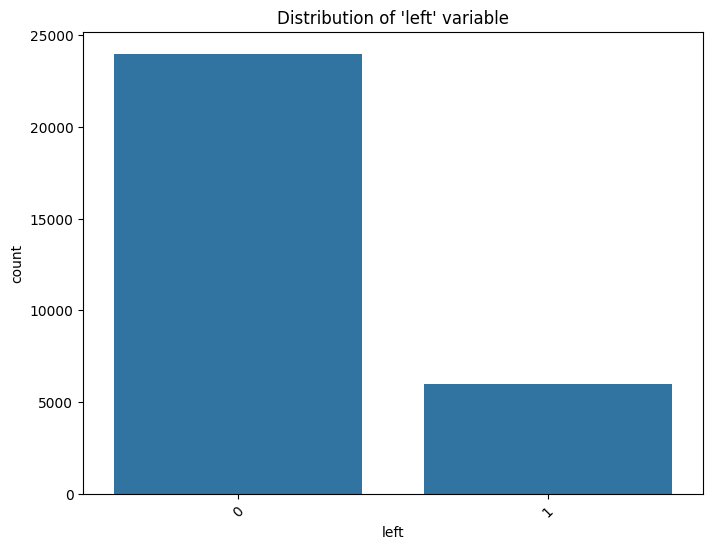

In [24]:
categorical_vars = ['dept', 'salary', 'left']
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=var, data=data)
    plt.title(f"Distribution of '{var}' variable")
    plt.xticks(rotation=45)
    plt.show()

In [26]:
pip install -U scikit-learn scipy matplotlib

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     --------------------------------- ------ 51.2/60.6 kB ? eta -:--:--
     ---------------------------------------- 60.6/60.6 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 4.5 MB/s eta 0:00:03
    --------------------------------------- 0.1/10.6 MB 3.8 MB/s eta 0:00:03
   - -------------------------------------- 0.3/10.6 MB 2.5 MB/s eta 0:00:05
   - -------------------------------------- 0.4/10.6 MB 2.3 MB/s eta 0:00:05
   - -------------------------------------- 0.5/10.6 MB 2.2 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/10.6 MB 2.4 MB/s eta 0:00:05
   -- ------------------------------------- 0.7/10.6 MB 2.2 MB/s eta 0:00:05
   -- ------------------------------------- 0.8/10.6 MB 2.3 MB/s eta 0:00:05
   --- ------------------------------------ 0.9/10.6 MB 2.3 MB/s eta 0:00:05
   --- -----

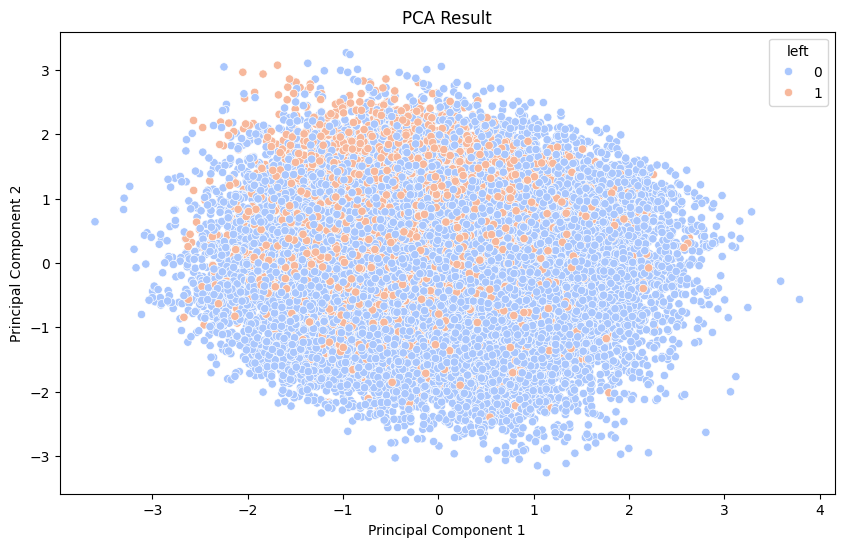

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects', 'avgMonthlyHours', 'timeSpent.company']])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=data['left'], palette='coolwarm')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.show()

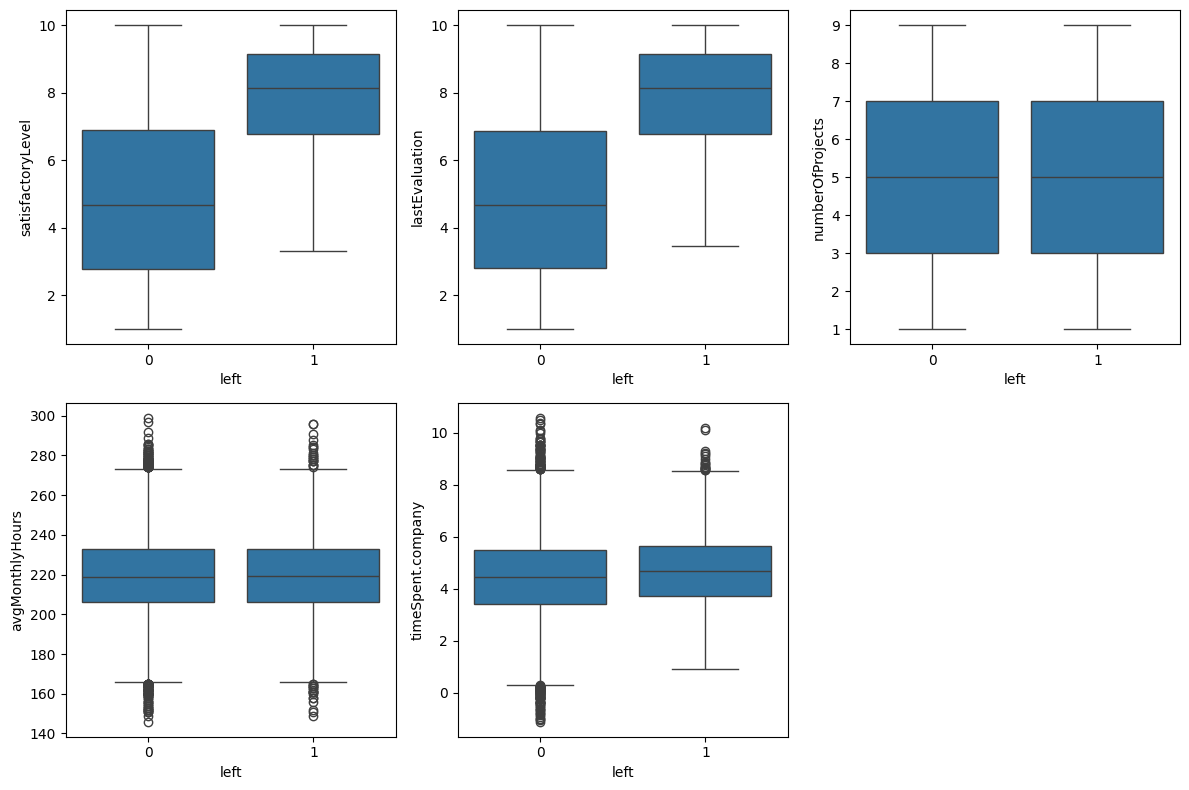

In [28]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects', 'avgMonthlyHours', 'timeSpent.company']):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='left', y=col, data=data)
plt.tight_layout()
plt.show()

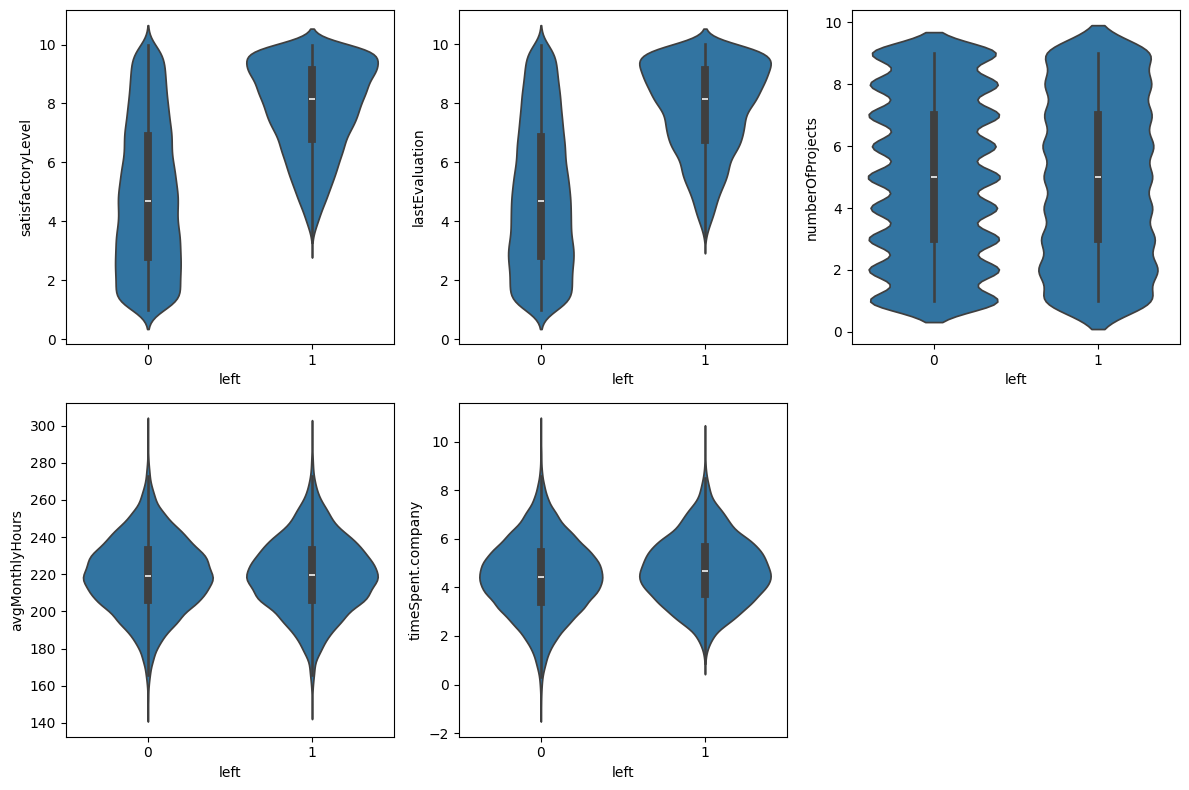

In [29]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects', 'avgMonthlyHours', 'timeSpent.company']):
    plt.subplot(2, 3, i+1)
    sns.violinplot(x='left', y=col, data=data)
plt.tight_layout()
plt.show()

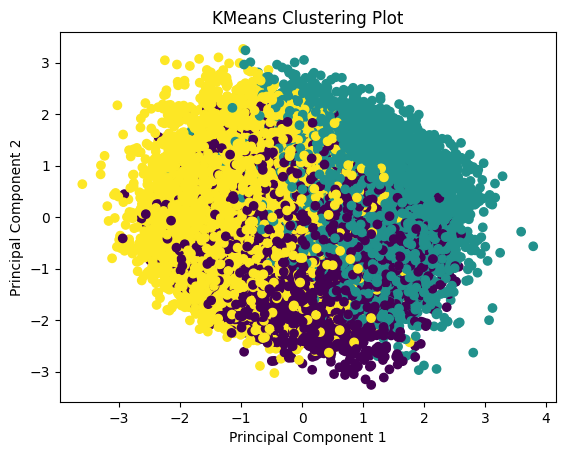

In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_data)
cluster_labels = kmeans.labels_

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering Plot')
plt.show()

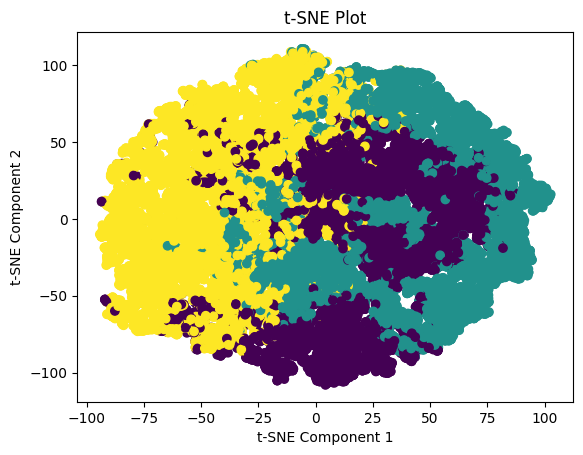

In [33]:
# t-SNE for visualization
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(scaled_data)

# Plot t-SNE results
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Plot')
plt.show()

### (Machine learning) - Model selection

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [35]:
data.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years,dept,salary,left
0,6.797957,3.066260,7,244,4.206831,0,0,technical,low,0
1,9.630808,9.304405,9,235,6.055493,0,0,marketing,low,1
2,5.125169,9.705333,4,237,4.959339,0,0,marketing,low,1
3,2.655206,1.682652,8,234,4.123693,1,0,marketing,low,0
4,4.021859,9.174195,8,192,5.234121,0,0,marketing,medium,0


In [36]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['dept_encoded'] = label_encoder.fit_transform(data['dept'])
data['salary_encoded'] = label_encoder.fit_transform(data['salary'])
data.drop(['dept', 'salary'], axis=1, inplace=True)
print(data.head())


   satisfactoryLevel  lastEvaluation  numberOfProjects  avgMonthlyHours  \
0           6.797957        3.066260                 7              244   
1           9.630808        9.304405                 9              235   
2           5.125169        9.705333                 4              237   
3           2.655206        1.682652                 8              234   
4           4.021859        9.174195                 8              192   

   timeSpent.company  workAccident  promotionInLast5years  left  dept_encoded  \
0           4.206831             0                      0     0             9   
1           6.055493             0                      0     1             5   
2           4.959339             0                      0     1             5   
3           4.123693             1                      0     0             5   
4           5.234121             0                      0     0             5   

   salary_encoded  
0               1  
1               1  
2 

In [37]:
X = data.drop(columns=['left'])
y = data['left']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
logreg = LogisticRegression()

In [40]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [41]:
y_pred = logreg.predict(X_test)

In [42]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9451666666666667

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4811
           1       0.86      0.86      0.86      1189

    accuracy                           0.95      6000
   macro avg       0.91      0.91      0.91      6000
weighted avg       0.95      0.95      0.95      6000


Confusion Matrix:
[[4644  167]
 [ 162 1027]]


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [44]:
clf = DecisionTreeClassifier(random_state=42)

In [45]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [46]:
y_pred = clf.predict(X_test)

In [47]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.989
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4811
           1       0.97      0.98      0.97      1189

    accuracy                           0.99      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.99      0.99      0.99      6000

Confusion Matrix:
[[4771   40]
 [  26 1163]]


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [49]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [50]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [51]:
y_pred = clf.predict(X_test)

### Results of the selected model

In [52]:

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9933333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4811
           1       0.99      0.98      0.98      1189

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000

Confusion Matrix:
[[4796   15]
 [  25 1164]]
